In [7]:
import numpy as np
import matplotlib.pyplot as plt

The problem of the formula on Wolfram:
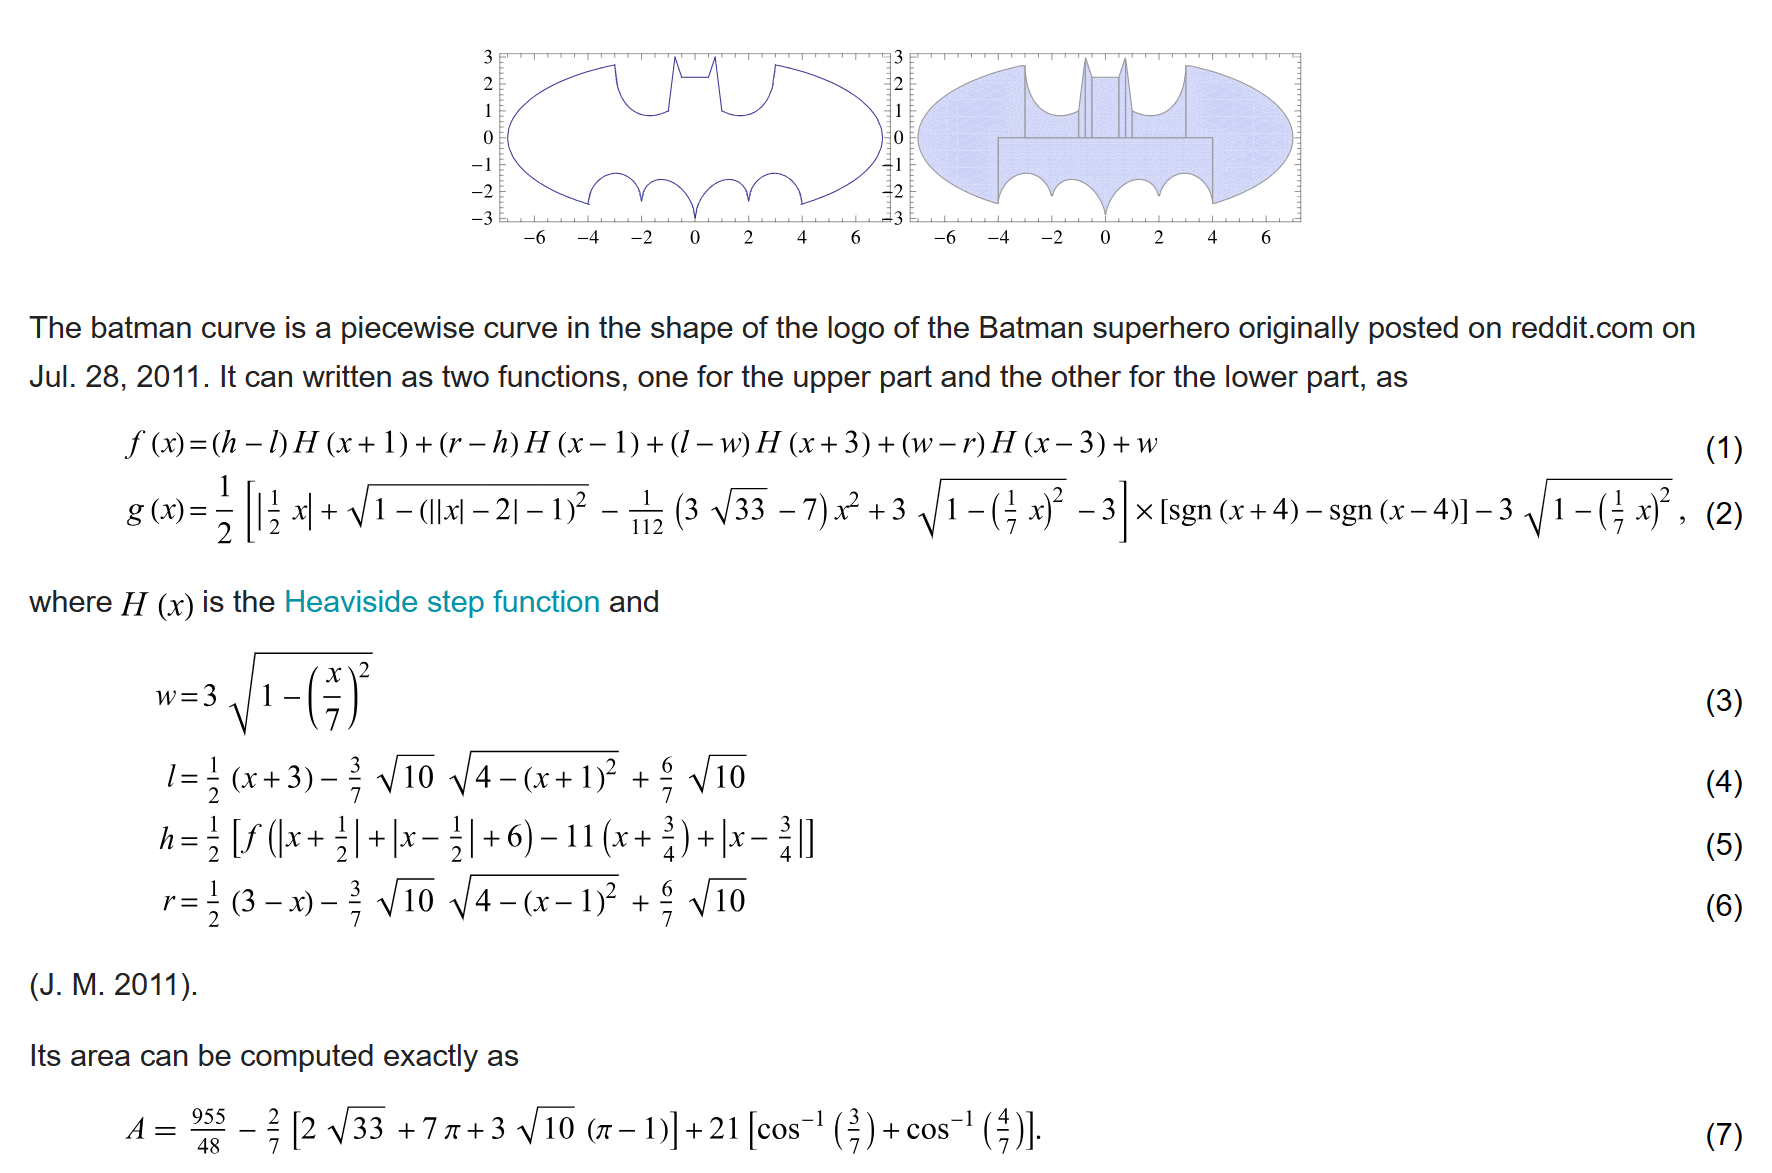

When $x\in(-1,1)$, the upper part $f(x)=h$

But $\left|x+\dfrac{1}{2}\right|+\left|x-\dfrac{1}{2}\right|+6\geq 7$,

and when $x>3$, $f(x)=w$.

However, the domain of $w$ is $[-7,7]$, which leads to the contradiction.

Thus, with current $h$, $f(x)$ is invalid in real numbers, we cannot get the upper part.

# Problem 6(From Wolfram)

To have a result, the $h$ is approximated by a similar function in the reference.

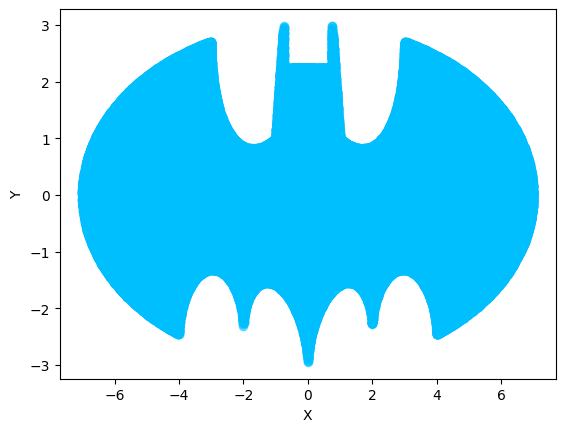

The area of the Batman is: 48.203568000000004


In [11]:
SAMPLE_NUM = 1000000

def w(x):
    return 3 * np.sqrt(1 - (x / 7) ** 2)
def l(x):
    return 0.5 * (x + 3) - 3 / 7 * np.sqrt(10) * np.sqrt(4 - (x + 1) ** 2) + 6 / 7 * np.sqrt(10)
def r(x):
    return 0.5 * (3 - x) - 3 / 7 * np.sqrt(10) * np.sqrt(4 - (x - 1) ** 2) + 6 / 7 * np.sqrt(10)

def Batman():
    def upper_bound(x, y):
        if -3 / 4 < x < 3 / 4:
            return y < 2.25
        elif -1 < x < 1:
            return y < -8 * np.abs(x) + 9
        elif 1 < x < 3:
            return y < r(x)
        elif -3 < x < -1:
            return y < l(x)
        else:
            return y < w(x)

    def lower_bound(x, y):
        if -4 < x < 4:
            x = np.abs(x)
            return y > ((1 / 2 * x) + np.sqrt(1 - (np.abs(x - 2) - 1) ** 2) - 1 / 112 * (3 * np.sqrt(33) - 7) * (x ** 2) - 3)
        else:
            return y > -3 * np.sqrt(1 - x ** 2 / 49)


    cnt = 0
    x_list = []
    y_list = []
    X = np.random.rand(SAMPLE_NUM) * 14 -7
    Y = np.random.rand(SAMPLE_NUM) * 6 - 3
    for t in range(len(X)):
        if upper_bound(X[t], Y[t]) and lower_bound(X[t], Y[t]):
            cnt += 1
            x_list.append(X[t])
            y_list.append(Y[t])
    plt.scatter(x_list, y_list, c="deepskyblue", alpha=0.5)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return cnt / SAMPLE_NUM * 6 * 14

print("The area of the Batman is:", Batman())

# Problem 6(Update h version)

This generate the same result in the website.

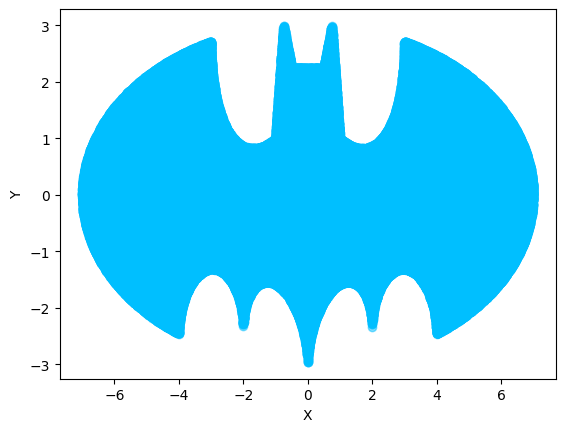

The area of the Batman is: 48.35359199999999


In [13]:
SAMPLE_NUM = 1000000

def w(x):
    return 3 * np.sqrt(1 - (x / 7) ** 2)
def l(x):
    return 0.5 * (x + 3) - 3 / 7 * np.sqrt(10) * np.sqrt(4 - (x + 1) ** 2) + 6 / 7 * np.sqrt(10)
def h(x):
    return 0.5 * (3 * (np.abs(x - 0.5) + np.abs(x + 0.5) + 6) - 11 * (np.abs(x - 0.75) + np.abs(x + 0.75)))
def r(x):
    return 0.5 * (3 - x) - 3 / 7 * np.sqrt(10) * np.sqrt(4 - (x - 1) ** 2) + 6 / 7 * np.sqrt(10)

def Batman():
    def upper_bound(x, y):
        if x > 3 or x < -3:
            return y < w(x)
        if 1 < x < 3:
            return y < r(x)
        if -1 < x < 1:
            return y < h(x)
        if -3 < x < -1:
            return y < l(x)
    def lower_bound(x,y):
        if -4 < x < 4:
            x = np.abs(x)
            return y > ((1 / 2 * np.abs(x)) + np.sqrt(1 - (np.abs(np.abs(x) - 2) -1 ) ** 2) - 1 / 112 * (3 * np.sqrt(33) - 7) * (x ** 2) - 3)
        else:
            return y > -3 * np.sqrt(1 - x ** 2 / 49)


    cnt = 0
    x_list = []
    y_list = []
    X = np.random.rand(SAMPLE_NUM) * 14 - 7
    Y = np.random.rand(SAMPLE_NUM) * 6 - 3

    for t in range(len(X)):
        if upper_bound(X[t], Y[t]) and lower_bound(X[t], Y[t]):
            cnt += 1
            x_list.append(X[t])
            y_list.append(Y[t])
    plt.scatter(x_list, y_list, c="deepskyblue", alpha=0.5)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return cnt / SAMPLE_NUM * 6 * 14

print("The area of the Batman is:", Batman())

In [6]:
exact_value = 955 / 48 - 2 / 7 * (2 * np.sqrt(33) + 7 * np.pi + 3 * np.sqrt(10) * (np.pi - 1)) + 21 * (np.arccos(3 / 7) + np.arccos(4 / 7))
print(f'{exact_value = }')

exact_value = 48.42435978031881
